In [10]:
import os
def total_files(folder_path):
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        return num_files
    else:
        print(f"Path not found: {folder_path}")
        return 0

# Train dataset
train_files_healthy = r"F:/MACHINE LEARNING/Leaf detection using CNN/Train/Healthy"
train_files_powdery = r"F:/MACHINE LEARNING/Leaf detection using CNN/Train/Powdery"
train_files_rust = r"F:/MACHINE LEARNING/Leaf detection using CNN/Train/Rust"

# Test datasest
test_files_healthy = r"F:/MACHINE LEARNING/Leaf detection using CNN/Test/Healthy"
test_files_powdery = r"F:/MACHINE LEARNING/Leaf detection using CNN/Test/Powdery"
test_files_rust = r"F:/MACHINE LEARNING/Leaf detection using CNN/Test/Rust"

# Validation datasest
valid_files_healthy = r"F:/MACHINE LEARNING/Leaf detection using CNN/Validation/Healthy"
valid_files_powdery = r"F:/MACHINE LEARNING/Leaf detection using CNN/Validation/Powdery"
valid_files_rust = r"F:/MACHINE LEARNING/Leaf detection using CNN/Validation/Rust"


# Train output
print("Number of healthy leaf images in the training set", total_files(train_files_healthy))
print("Number of powdery leaf images in the training set", total_files(train_files_powdery))
print("Number of rust leaf images in the training set", total_files(train_files_rust))

print("--------------------------------------------------------------------------")

# Test output
print("Number of healthy leaf images in the test set", total_files(test_files_healthy))
print("Number of powdery leaf images in the test set", total_files(test_files_powdery))
print("Number of rust leaf images in the test set", total_files(test_files_rust))

print("--------------------------------------------------------------------------")

# Validation output
print("Number of healthy leaf images in the validation set", total_files(valid_files_healthy))
print("Number of powdery leaf images in the validation set", total_files(valid_files_powdery))
print("Number of rust leaf images in the validation set", total_files(valid_files_rust))

Number of healthy leaf images in the training set 456
Number of powdery leaf images in the training set 430
Number of rust leaf images in the training set 434
--------------------------------------------------------------------------
Number of healthy leaf images in the test set 50
Number of powdery leaf images in the test set 50
Number of rust leaf images in the test set 50
--------------------------------------------------------------------------
Number of healthy leaf images in the validation set 20
Number of powdery leaf images in the validation set 20
Number of rust leaf images in the validation set 20


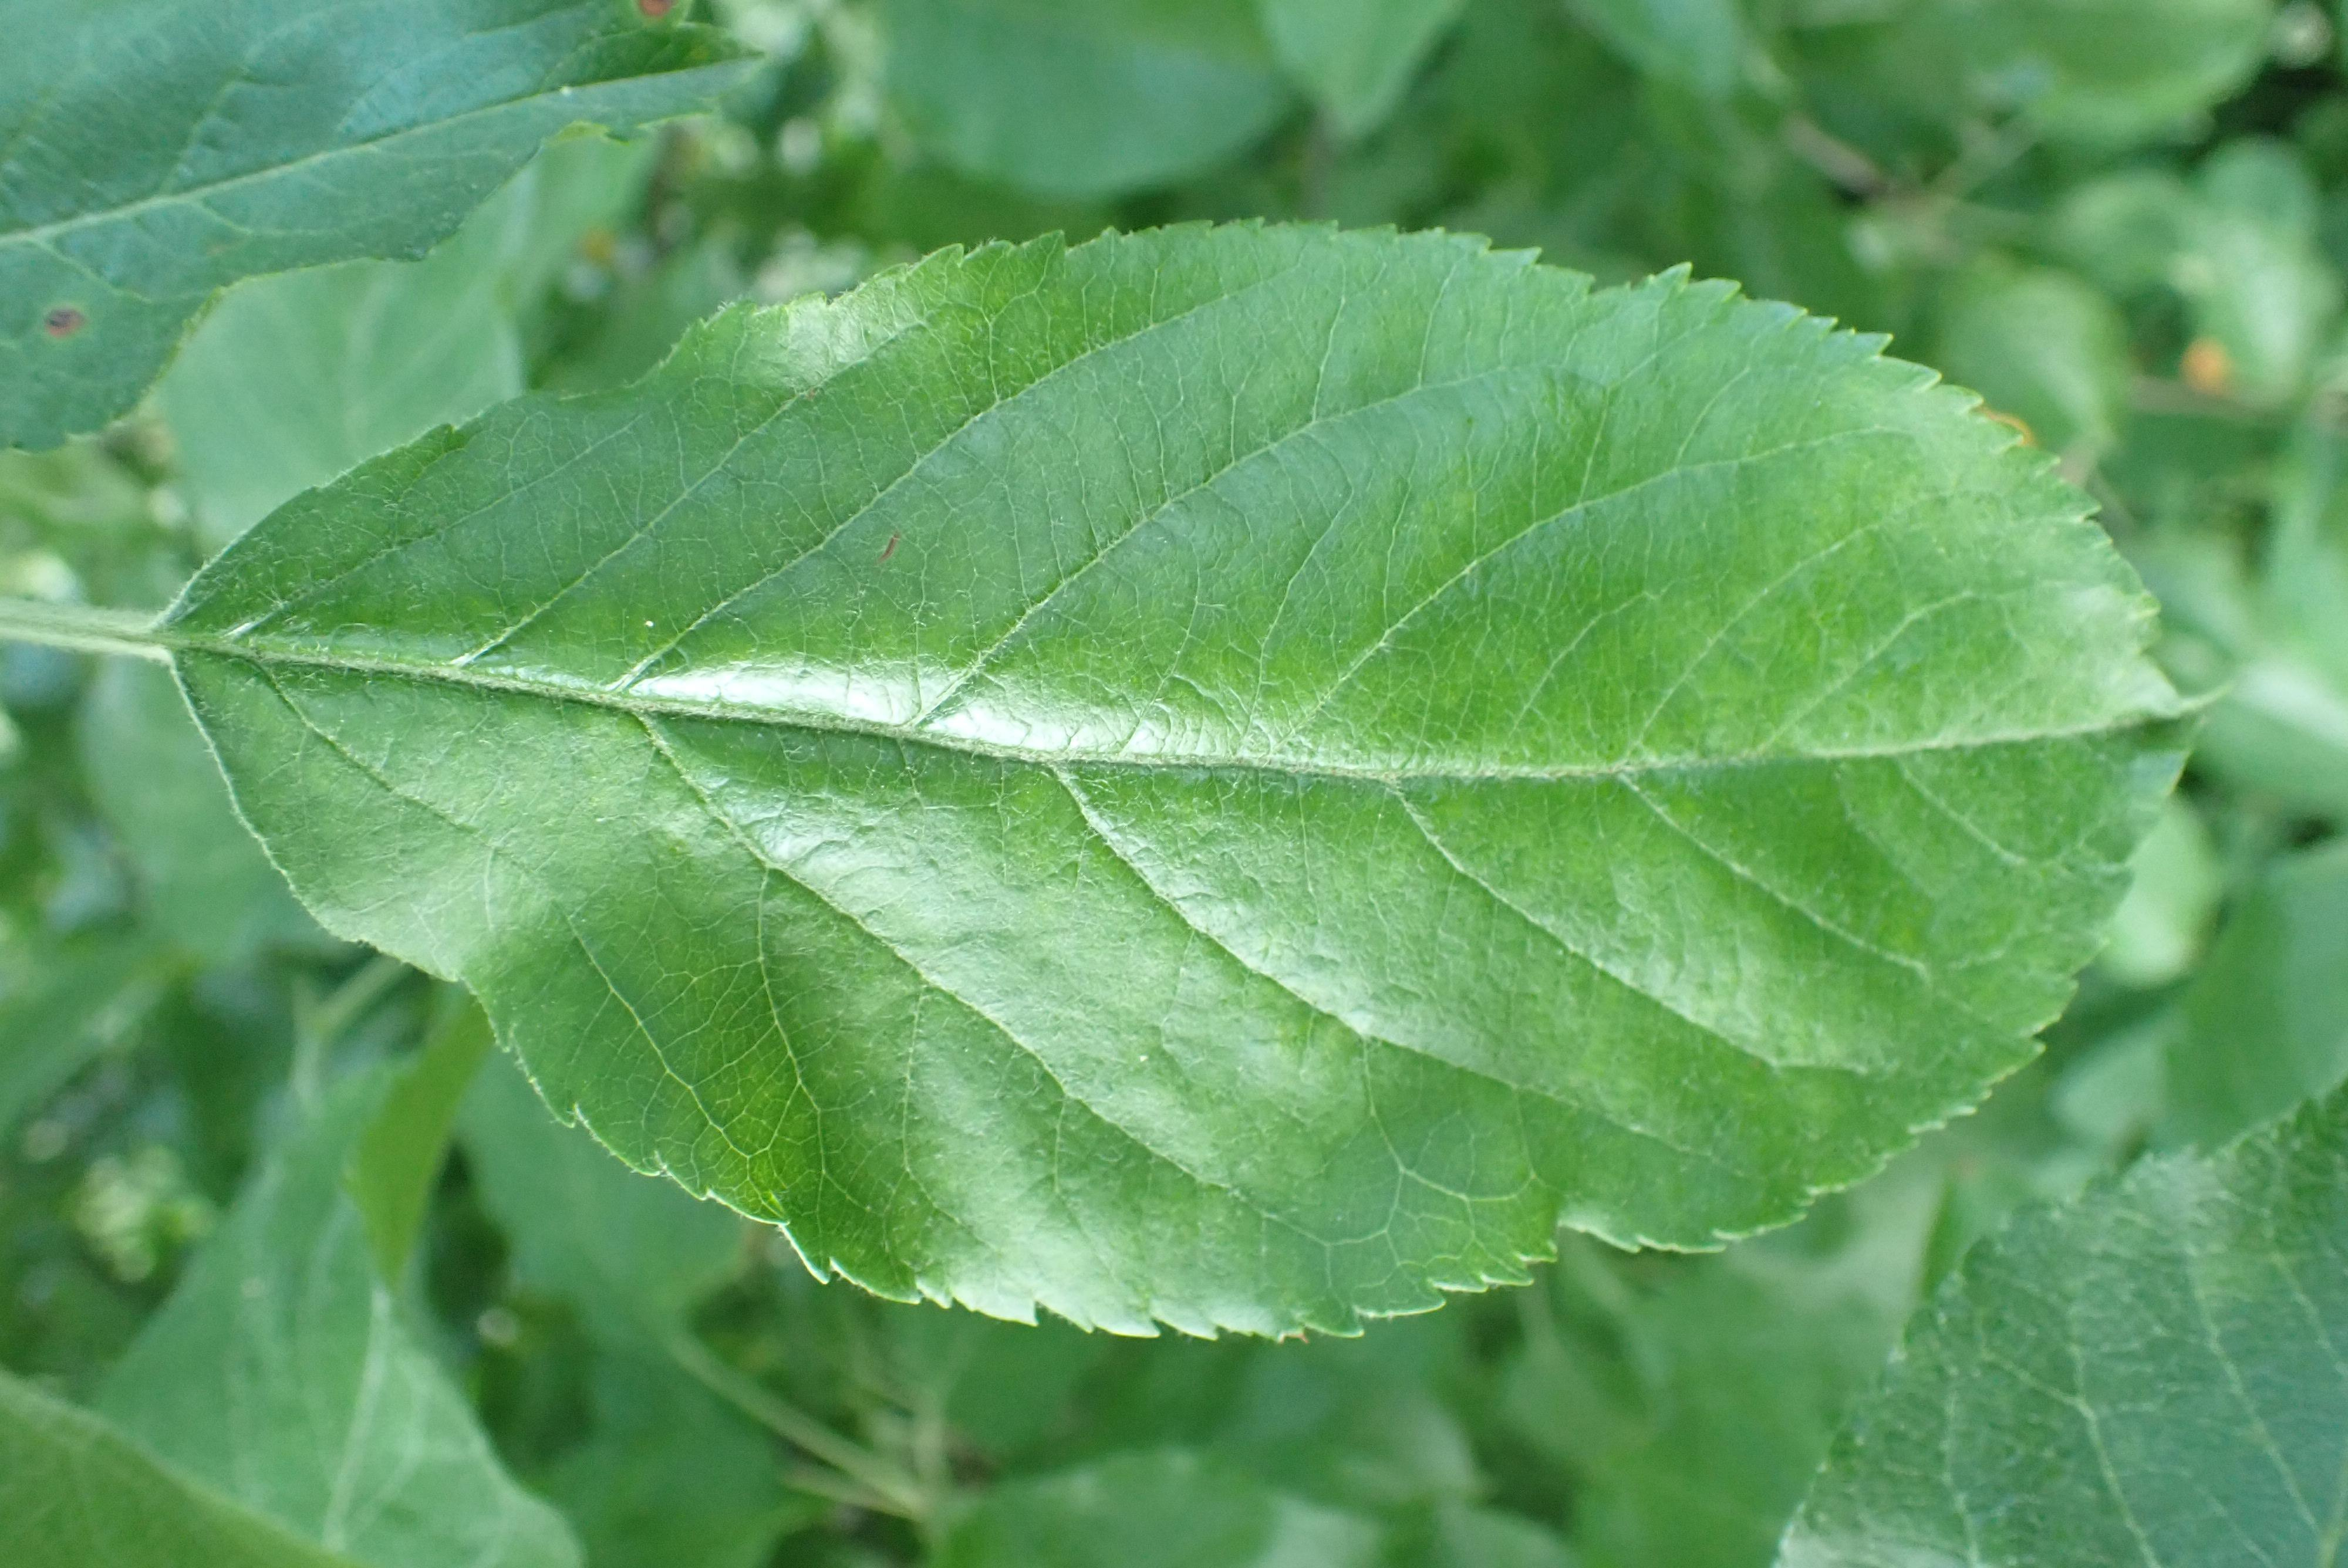

In [16]:
from PIL import Image
import IPython.display as display

image_path = r'F:/MACHINE LEARNING/Leaf detection using CNN/Train/Healthy/8ce77048e12f3dd4.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

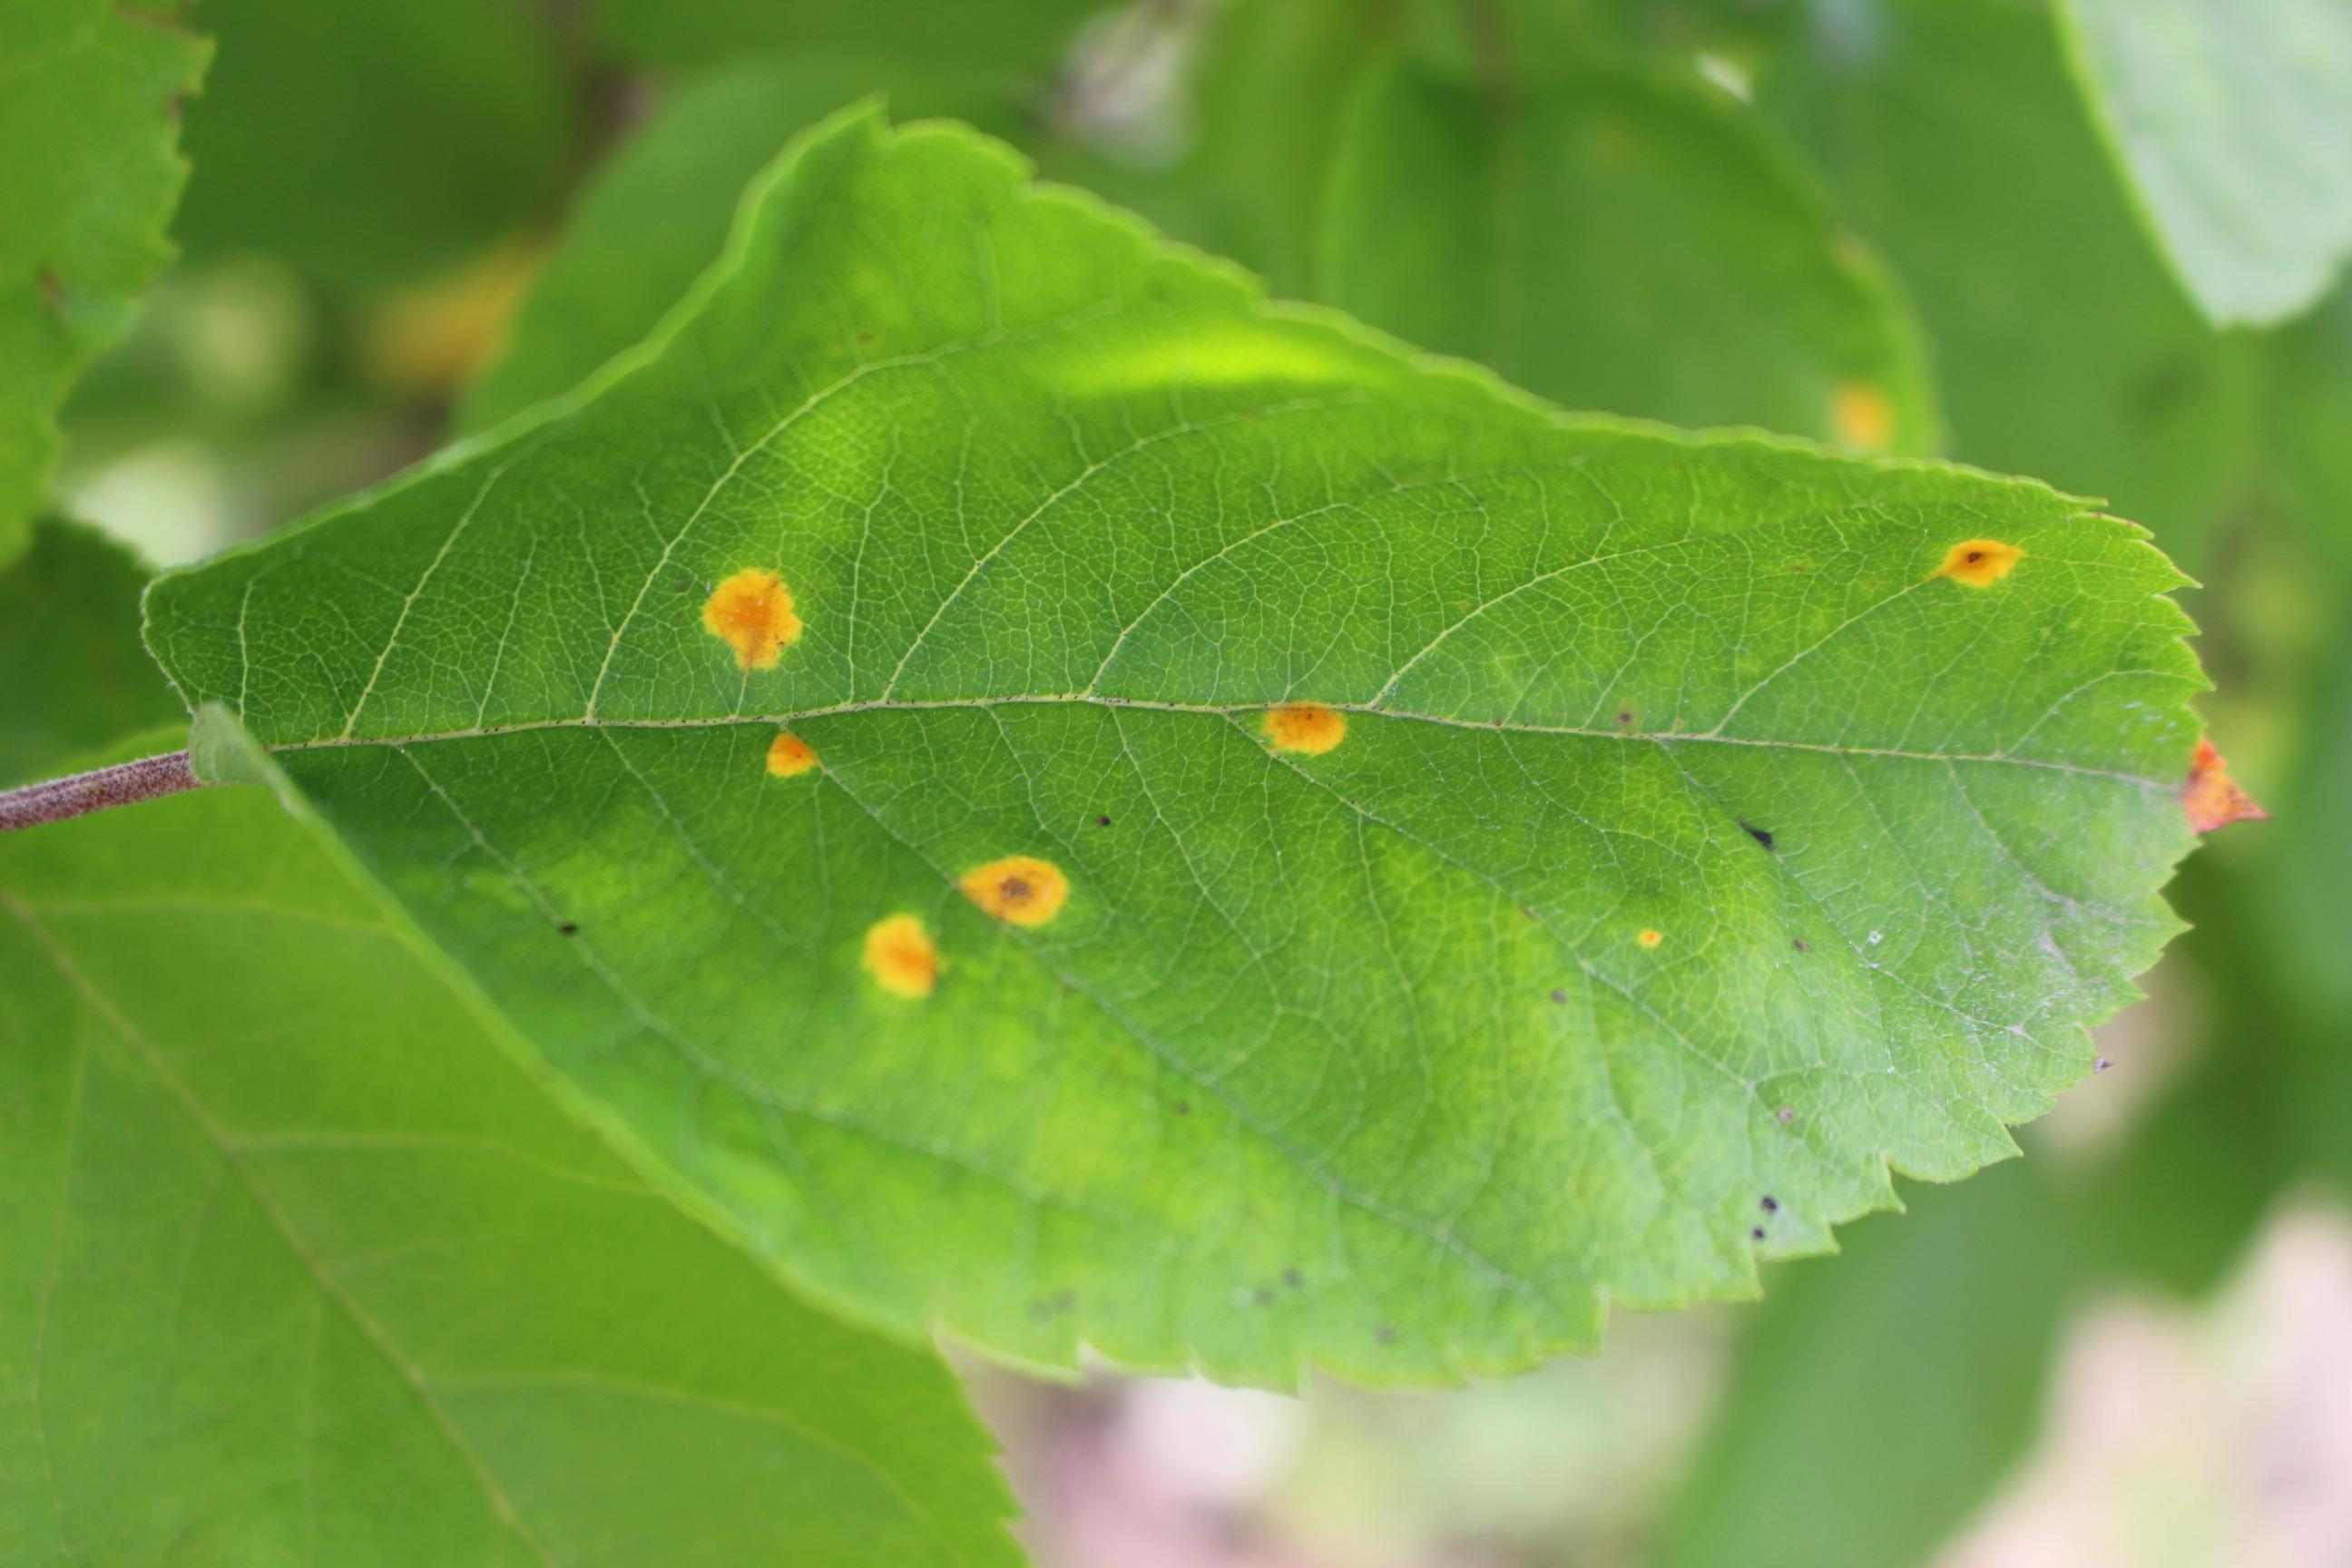

In [17]:
image_path = r'F:/MACHINE LEARNING/Leaf detection using CNN/Train/Rust/8e6eaa642b02b5fa.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [30]:
#!pip install keras
#!pip install tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(r"F:/MACHINE LEARNING/Leaf detection using CNN/Train",
                                                   target_size=(225, 225),
                                                   batch_size=32,
                                                   class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"F:/MACHINE LEARNING/Leaf detection using CNN/Validation",
                                                   target_size=(225, 225),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 1320 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))




C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_generator,
                   batch_size=16,
                    epochs=5,
                   validation_data=validation_generator,
                   validation_batch_size=16
                   )

Epoch 1/5


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.3853 - loss: 3.5148 - val_accuracy: 0.5333 - val_loss: 0.8618
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.7143 - loss: 0.6719 - val_accuracy: 0.8167 - val_loss: 0.5391
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.8454 - loss: 0.4053 - val_accuracy: 0.8333 - val_loss: 0.4330
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.8919 - loss: 0.3028 - val_accuracy: 0.8500 - val_loss: 0.4416
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.9238 - loss: 0.2278 - val_accuracy: 0.8167 - val_loss: 0.4018


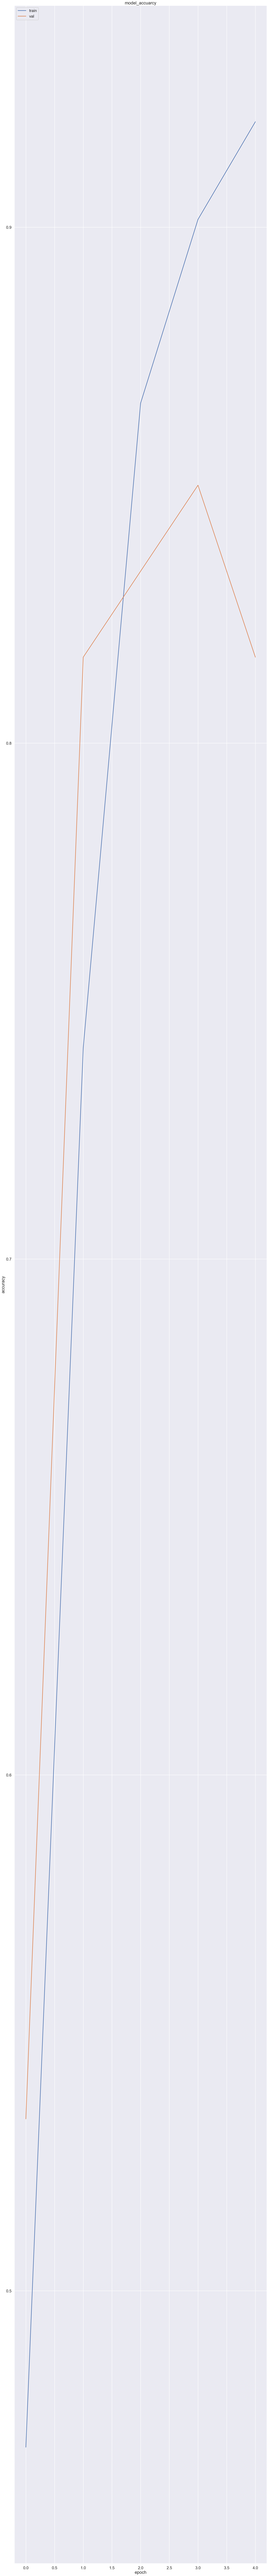

In [41]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25,255), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model_accuarcy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [49]:
model.save("model.keras")

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r'F:/MACHINE LEARNING/Leaf detection using CNN/Test/Rust/87e3d0c12a7ba995.jpg')

In [46]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


array([1.3069053e-01, 4.2726433e-06, 8.6930525e-01], dtype=float32)

In [47]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [48]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
